<a href="https://colab.research.google.com/github/katemartian/FiberPhotometryDataAnalysis/blob/master/LHAretro_allTests_manuscript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> LHA-retro All tests

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/!lab/!FP/LHA Manuscript/

/content/drive/My Drive/!lab/!FP/LHA Manuscript


In [3]:
%run /content/drive/My\ Drive/!lab/FiberPhotometryDataAnalysis.ipynb

All Fiber Photometry functions are ready to use


In [4]:
mice = ['LHA87','LHA90','LHA91','LHA92']
outputs = ['LHA-VTA','LHA-DRN']
tests = ['APT','SCT','OFT','TST']

# Stats

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("nlme")
install.packages("multcomp")

In [ ]:
%%R
require(nlme)
require(multcomp)

# Save recordings to HDF file

In [13]:
folders = {'APT': ['/content/drive/My Drive/!lab/!FP/2019-06-21 LHA-retro Airpuff/raw/',
                   '/content/drive/My Drive/!lab/!FP/2019-07-09 LHA-retro Airpuff2/raw/'],
           'SCT': ['/content/drive/My Drive/!lab/!FP/2019-06-26_to_07-03 LHA-retro Sucrose/raw/',
                   '/content/drive/My Drive/!lab/!FP/2019-07-10 LHA-retro Sucrose2/raw/'],
           'OFT': ['/content/drive/My Drive/!lab/!FP/2019-07-04 LHA-retro OFT-TST/raw/'],
           'TST': ['/content/drive/My Drive/!lab/!FP/2019-07-04 LHA-retro OFT-TST/raw/']}

#### APT

In [14]:
test = 'APT'
apt_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['green'])
  for f in files:
    apt_full_file_names.append(folder+f)
#apt_full_file_names

In [15]:
for file_ in apt_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  outputs = ['LHA-VTA','LHA-DRN']
  experiment = sepname[4]
  if experiment[-1] == 'f':
    trial = '1'
  else:
    trial = experiment[-1]
 

 # Red signal
  red_name = find_files(folder,[mouse,experiment,'red'])[0]
  df_green = pd.read_csv(file_,sep=' ',index_col=False)
  df_red = pd.read_csv(folder+'/'+red_name,sep=' ',index_col=False) 

 # Adjust file length
  if len(df_green) % 3 != 0:
    df_green.drop(df_green.index[-1],inplace=True)
    df_red.drop(df_red.index[-1],inplace=True)
    if len(df_green) % 3 != 0:
      df_green.drop(df_green.index[-1],inplace=True)
      df_red.drop(df_red.index[-1],inplace=True)

 # Signal -------------------------------------------------------------------
  if trial == '1':
    # 415-3rd, 470-1st, 560-2nd
    references = {'LHA-VTA': np.array(df_green.iloc[2::3,0]),
                  'LHA-DRN': np.array(df_green.iloc[2::3,0])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::3,0]),
                  'LHA-DRN': np.array(df_red.iloc[1::3,0])}
  if trial == '2' or (mouse == 'LHA91' and trial == '1'):
    # 415-1st, 470-2nd, 560-3rd
    references = {'LHA-VTA': np.array(df_green.iloc[::3,0]),
                  'LHA-DRN': np.array(df_green.iloc[::3,0])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[1::3,0]),
                  'LHA-DRN': np.array(df_red.iloc[2::3,0])}
  if mouse == 'LHA92' and trial == '2':
    # 415-2nd, 470-3rd, 560-1st 
    references = {'LHA-VTA': np.array(df_green.iloc[1::3,0]),
                  'LHA-DRN': np.array(df_green.iloc[1::3,0])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[2::3,0]),
                  'LHA-DRN': np.array(df_red.iloc[ ::3,0])}

 # Time vector
  realtime_fp = create_realtime(10,mm=list(df_green['Item4']),ss=list(df_green['Item5']),ms=list(df_green['Item6']))
  time_fp = time_to_seconds(realtime_fp, realtime_fp[0])
  time_ = time_fp[::3]

  # Behavioral events ----------------------------------------------------------
  key_name = find_files(folder,[mouse, experiment,'keypress'])[0]
  df_key = pd.read_csv(folder+'/'+key_name,sep=' ',index_col=False,header=None)
  realtime_ap = create_realtime(10,mm=list(df_key.iloc[:,1]),ss=list(df_key.iloc[:,2]),ms=list(df_key.iloc[:,3]))
  airpuff = time_to_seconds(realtime_ap,realtime_fp[0])

  airpuff = np.array(airpuff).reshape(len(airpuff),1)
  airpuff = airpuff - 0.5

  events = {'airpuff': airpuff}
  
  raw = FiberPhotometryRecording(signals,references,time_,events,mouse=mouse,test='APT',trial=trial)
  raw.saveRecording('LHA-retro.h5')
  print(raw.mouse,raw.test,raw.trial)
  #print(airpuff)

LHA87 APT 1
LHA90 APT 1
LHA91 APT 1
LHA92 APT 1
LHA87 APT 2
LHA90 APT 2
LHA91 APT 2
LHA92 APT 2


#### SCT

In [16]:
test = 'SCT'
sct_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['green'])
  for f in files:
    sct_full_file_names.append(folder+f)
#sct_full_file_names

In [17]:
for file_ in sct_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  outputs = ['LHA-VTA','LHA-DRN']
  experiment = sepname[4]
  if experiment[-1] == 'e':
    trial = '1'
  else:
    trial = experiment[-1]
 
 # Red signal
  red_name = find_files(folder,[mouse,experiment,'red'])[0]
  df_green = pd.read_csv(file_,sep=' ',index_col=False)
  df_red = pd.read_csv(folder+'/'+red_name,sep=' ',index_col=False) 

 # Adjust file length
  if len(df_green) % 3 != 0:
    df_green.drop(df_green.index[-1],inplace=True)
    df_red.drop(df_red.index[-1],inplace=True)
    if len(df_green) % 3 != 0:
      df_green.drop(df_green.index[-1],inplace=True)
      df_red.drop(df_red.index[-1],inplace=True)

 # Raw signal -------------------------------------------------------------------
  # 415-1st, 470-2nd, 560-3rd
  references = {'LHA-VTA': np.array(df_green.iloc[::3,0]),
                'LHA-DRN': np.array(df_green.iloc[::3,0])}
  signals  =  { 'LHA-VTA': np.array(df_green.iloc[1::3,0]),
                'LHA-DRN': np.array(df_red.iloc[2::3,0])}
  if mouse=='LHA87' and trial=='1':
    # 415-2nd, 470-3rd, 560-1st 
    references = {'LHA-VTA': np.array(df_green.iloc[1::3,0]),
                  'LHA-DRN': np.array(df_green.iloc[1::3,0])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[2::3,0]),
                  'LHA-DRN': np.array(df_red.iloc[ ::3,0])}
  if mouse=='LHA90' and trial=='2':
    # 415-3rd, 470-1st, 560-2nd
    references = {'LHA-VTA': np.array(df_green.iloc[2::3,0]),
                  'LHA-DRN': np.array(df_green.iloc[2::3,0])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::3,0]),
                  'LHA-DRN': np.array(df_red.iloc[1::3,0])}

 
 # Anymaze file
  name_am = mouse+'_'+experiment+'_anymaze.csv'
  df_am = pd.read_csv(folder+'/'+name_am,sep=',',index_col=False)
  realtime_am = df_am['Time']
  
 # Time vector
  hour = int(realtime_am[0].split(':')[0])
  realtime_fp = create_realtime(hour,mm=list(df_green['Item4']),ss=list(df_green['Item5']),ms=list(df_green['Item6']))
  time_fp = time_to_seconds(realtime_fp, realtime_fp[0])
  time_am = time_to_seconds(realtime_am, realtime_fp[0])
  time_ = time_fp[::3]

  # Behavioral events ------------------------------------------------------------
  
  speed = np.array(df_am['Speed'])*100 # cm/s
  mobility_score = np.array(df_am['Freezing score'])
  movement = np.interp(speed, (np.nanmin(speed),np.nanmax(speed)), (0,1))
  # Immobility onsets and offsets
  immobility = find_onoffset_immobility(movement, time_am, 1, 0.15, 0.2)

  # Sucrose licking measured by Anymaze
  licks = df_am['Lick active']
  consumption = event_onoffset(licks,time_am)
  consumption = adjust_intervals_durations(consumption,1,1)

  events = {'consumption': consumption,
             'immobility': immobility}

  measurements = {'movement': {'time': time_am,
                             'values': movement},
                     'licks': {'time': time_am,
                             'values': licks}}

  
  raw = FiberPhotometryRecording(signals,references,time_,events,measurements,mouse,'SCT',trial)
  raw.saveRecording('LHA-retro.h5')
  print(raw.mouse,raw.test,raw.trial)

LHA87 SCT 1
LHA90 SCT 1
LHA91 SCT 1
LHA92 SCT 1
LHA92 SCT 2
LHA91 SCT 2
LHA90 SCT 2
LHA87 SCT 2


#### OFT

In [18]:
test = 'OFT'
oft_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['green',test])
  for f in files:
    oft_full_file_names.append(folder+f)
#oft_full_file_names

In [19]:
for file_ in oft_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  outputs = ['LHA-VTA','LHA-DRN']
  experiment = sepname[4]
 
 # Red signal
  red_name = find_files(folder,[mouse,experiment,'red'])[0]
  df_green = pd.read_csv(file_,sep=' ',index_col=False)
  df_red = pd.read_csv(folder+'/'+red_name,sep=' ',index_col=False) 

 # Adjust file length
  if len(df_green) % 3 != 0:
    df_green.drop(df_green.index[-1],inplace=True)
    df_red.drop(df_red.index[-1],inplace=True)
    if len(df_green) % 3 != 0:
      df_green.drop(df_green.index[-1],inplace=True)
      df_red.drop(df_red.index[-1],inplace=True)

 # Raw signal -------------------------------------------------------------------
  # 415-1st, 470-2nd, 560-3rd
  references = {'LHA-VTA': np.array(df_green.iloc[::3,0]),
                'LHA-DRN': np.array(df_green.iloc[::3,0])}
  signals  =  { 'LHA-VTA': np.array(df_green.iloc[1::3,0]),
                'LHA-DRN': np.array(df_red.iloc[2::3,0])}
  if mouse=='LHA92':
    # 415-3rd, 470-1st, 560-2nd
    references = {'LHA-VTA': np.array(df_green.iloc[2::3,0]),
                  'LHA-DRN': np.array(df_green.iloc[2::3,0])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::3,0]),
                  'LHA-DRN': np.array(df_red.iloc[1::3,0])}

  # Anymaze file
  name_am = mouse+'_'+experiment+'_anymaze.csv'
  df_am = pd.read_csv(folder+'/'+name_am,sep=',',index_col=False)
  realtime_am = df_am['Time']
  
 # Time vector
  hour = int(realtime_am[0].split(':')[0])
  realtime_fp = create_realtime(hour,mm=list(df_green['Item4']),ss=list(df_green['Item5']),ms=list(df_green['Item6']))
  time_fp = time_to_seconds(realtime_fp, realtime_fp[0])
  time_am = time_to_seconds(realtime_am, realtime_fp[0])
  time_ = time_fp[::3]

  # Behavioral events ------------------------------------------------------------
  
  speed = np.array(df_am['Speed'])*100 # cm/s
  mobility_score = np.array(df_am['Freezing score'])
  movement = np.interp(speed, (np.nanmin(speed),np.nanmax(speed)), (0,1))
  # Immobility onsets and offsets
  immobility = find_onoffset_immobility(movement, time_am, 1, 0.1, 0.15)

  events = {'immobility': immobility}

  measurements = {'movement': {'time': time_am,
                             'values': movement}}

  
  raw = FiberPhotometryRecording(signals,references,time_,events,measurements,mouse,'OFT')
  raw.saveRecording('LHA-retro.h5')
  print(raw.mouse,raw.test,raw.trial)

LHA87 OFT 1
LHA90 OFT 1
LHA91 OFT 1
LHA92 OFT 1


#### TST

In [20]:
test = 'TST'
tst_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['green',test])
  for f in files:
    tst_full_file_names.append(folder+f)
#tst_full_file_names

In [21]:
for file_ in tst_full_file_names:

  file_split = file_.split('/')
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  outputs = ['LHA-VTA','LHA-DRN']
  experiment = sepname[4]
 
 # Red signal
  red_name = find_files(folder,[mouse,experiment,'red'])[0]
  df_green = pd.read_csv(file_,sep=' ',index_col=False)
  df_red = pd.read_csv(folder+'/'+red_name,sep=' ',index_col=False)

 # Interpolate missed frames
  #if mouse == 'LHA90':
  #  df_green = interpolate_missed_frames(df_green)
  #  df_red = interpolate_missed_frames(df_red)

 # Adjust file length
  if len(df_green) % 3 != 0:
    df_green.drop(df_green.index[-1],inplace=True)
    df_red.drop(df_red.index[-1],inplace=True)
    if len(df_green) % 3 != 0:
      df_green.drop(df_green.index[-1],inplace=True)
      df_red.drop(df_red.index[-1],inplace=True)

 # Raw signal -------------------------------------------------------------------

  if mouse in ['LHA91']:
    # 415-2nd, 470-3rd, 560-1st 
    references = {'LHA-VTA': np.array(df_green.iloc[1::3,0]),
                  'LHA-DRN': np.array(df_green.iloc[1::3,0])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[2::3,0]),
                  'LHA-DRN': np.array(df_red.iloc[ ::3,0])}

  if mouse in ['LHA87','LHA92','LHA90']:
    # 415-3rd, 470-1st, 560-2nd
    references = {'LHA-VTA': np.array(df_green.iloc[2::3,0]),
                  'LHA-DRN': np.array(df_green.iloc[2::3,0])}
    signals  =  { 'LHA-VTA': np.array(df_green.iloc[ ::3,0]),
                  'LHA-DRN': np.array(df_red.iloc[1::3,0])}


  # Anymaze file
  name_am = mouse+'_'+experiment+'_anymaze.csv'
  df_am = pd.read_csv(folder+'/'+name_am,sep=',',index_col=False)
  realtime_am = df_am['Time']
  
 # Time vector
  hour = int(realtime_am[0].split(':')[0])
  realtime_fp = create_realtime(hour,mm=list(df_green['Item4']),ss=list(df_green['Item5']),ms=list(df_green['Item6']))
  time_fp = time_to_seconds(realtime_fp, realtime_fp[0])
  time_am = time_to_seconds(realtime_am, realtime_fp[0])
  time_ = time_fp[::3]

  # Behavioral events ------------------------------------------------------------
  
  speed = np.array(df_am['Speed'])*100 # cm/s
  mobility_score = np.array(df_am['Freezing score'])
  movement = np.interp(speed, (np.nanmin(speed),np.nanmax(speed)), (0,1))
  #movement = np.interp(mobility_score, (np.nanmin(mobility_score),np.nanmax(mobility_score)),(0,1))

  # Immobility onsets and offsets
  immobility = find_onoffset_immobility(movement, time_am, 1, 0.1, 0.15)

  events = {'immobility': immobility}

  measurements = {'movement': {'time': time_am,
                             'values': movement}}
                             
  
  raw = FiberPhotometryRecording(signals,references,time_,events,measurements,mouse,'TST')
  raw.saveRecording('LHA-retro.h5')
  print(raw.mouse,raw.test,raw.trial)
  #print(raw.events)

LHA87 TST 1
LHA91 TST 1
LHA92 TST 1
LHA90 TST 1


# Processing

In [22]:
info_for_array = {'airpuff': {'window': [-5.0,5.0],
                           'avg_frame': [-2.0,-1.0],
                             'figsize': (12,10)},
              'consumption': {'window': [-5.0,5.0],
                            'duration': 2.0,
                           'interaval': 2.0,
                           'avg_frame': [-2.0,-1.0],
                             'figsize': (24,10)},
               'immobility': {'window': [-5.0,5.0],
                            'duration': 2.0,
                           'interaval': 2.0,
                             'figsize': (24,10)}}

In [23]:
for test in tests:
  for mouse in mice:
    for trial in ['1','2']:

        r = FiberPhotometryRecording()
        r.loadRecording('LHA-retro.h5',mouse,test,trial)
        if r.rawSignals != {}:
          #print(r.events)
          r.getDFF(airpls_lambda=5e3,smooth_win=1.5)#,plot=True,save=True)
          if r.measurements is not None:
            r.smoothMeasurements(smooth_win=2)
            r.interpolateMeasurements(period=0.1)
          r.getPerievents(info_for_array)#,plot=True,save=True)
          r.saveRecording('LHA-retro.h5')
        del r

The recording for mouse LHA87 in the experiment APT-1 is successfully loaded.
The recording for mouse LHA87 in the experiment APT-2 is successfully loaded.
The recording for mouse LHA90 in the experiment APT-1 is successfully loaded.
The recording for mouse LHA90 in the experiment APT-2 is successfully loaded.
The recording for mouse LHA91 in the experiment APT-1 is successfully loaded.
The recording for mouse LHA91 in the experiment APT-2 is successfully loaded.
The recording for mouse LHA92 in the experiment APT-1 is successfully loaded.
The recording for mouse LHA92 in the experiment APT-2 is successfully loaded.
The recording for mouse LHA87 in the experiment SCT-1 is successfully loaded.
The recording for mouse LHA87 in the experiment SCT-2 is successfully loaded.
The recording for mouse LHA90 in the experiment SCT-1 is successfully loaded.
The recording for mouse LHA90 in the experiment SCT-2 is successfully loaded.
The recording for mouse LHA91 in the experiment SCT-1 is success

In [ ]:
#exp = FiberPhotometryExperiment('LHA-retro.h5','TST')
#exp.removeExperiment('all')

# Summary plots 

#### Set attributes


In [24]:
with h5py.File('LHA-retro.h5', 'a') as f:
  f.attrs['mice'] = mice
  f.attrs['outputs'] = outputs
  f.attrs['tests'] = tests
  f.attrs['good recordings'] = [['LHA87','APT','2','LHA-DRN'],
                                ['LHA87','APT','2','LHA-VTA'],
                                ['LHA90','APT','2','LHA-DRN'],
                                ['LHA90','APT','1','LHA-VTA'],
                                ['LHA90','APT','2','LHA-VTA'],
                                ['LHA91','APT','1','LHA-DRN'],
                                ['LHA91','APT','2','LHA-DRN'],
                                ['LHA91','APT','1','LHA-VTA'],
                                ['LHA91','APT','2','LHA-VTA'],
                                ['LHA92','APT','1','LHA-DRN'],
                                ['LHA92','APT','2','LHA-DRN'],
                                ['LHA92','APT','1','LHA-VTA'],
                                ['LHA92','APT','2','LHA-VTA'],
                                ['LHA87','SCT','2','LHA-DRN'],
                                ['LHA87','SCT','2','LHA-VTA'],
                                ['LHA90','SCT','2','LHA-VTA'],
                                ['LHA91','SCT','2','LHA-DRN'],
                                #['LHA91','SCT','2','LHA-VTA'],
                                ['LHA92','SCT','2','LHA-DRN'],
                                ['LHA92','SCT','2','LHA-VTA'],
                                ['LHA87','OFT','1','LHA-DRN'],
                                ['LHA87','OFT','1','LHA-VTA'],
                                #['LHA90','OFT','1','LHA-DRN'],
                                ['LHA90','OFT','1','LHA-VTA'],
                                ['LHA91','OFT','1','LHA-DRN'],
                                ['LHA91','OFT','1','LHA-VTA'],
                                ['LHA92','OFT','1','LHA-DRN'],
                                ['LHA92','OFT','1','LHA-VTA'],
                                ['LHA87','TST','1','LHA-DRN'],
                                ['LHA87','TST','1','LHA-VTA'],
                                #['LHA90','TST','1','LHA-DRN'],
                                ['LHA90','TST','1','LHA-VTA'],
                                ['LHA91','TST','1','LHA-DRN'],
                                ['LHA91','TST','1','LHA-VTA'],
                                ['LHA92','TST','1','LHA-DRN'],
                                ['LHA92','TST','1','LHA-VTA']]

#### APT

In [25]:
apt = FiberPhotometryTest('LHA-retro.h5','APT')

Experiment information for test APT is successfully loaded.


In [26]:
apt.getMeans(auc_frames={'airpuff-onset': [[-2,-1],[0,1.5]]})

LHA87,2 LHA90,2 LHA91,1 LHA91,2 LHA92,1 LHA92,2 .
Saved dF/F mean traces for LHA-DRN airpuff-onset
LHA87,2 LHA90,1 LHA90,2 LHA91,1 LHA91,2 LHA92,1 LHA92,2 .
Saved dF/F mean traces for LHA-VTA airpuff-onset


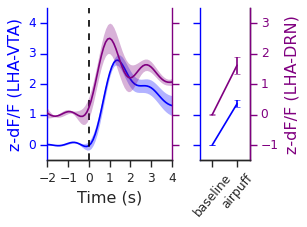

In [28]:
apt.plotMeans('LHA-VTA','airpuff',output2='LHA-DRN',periods=['baseline','airpuff'],
              plot_type='mean and SEM',xlim=[-2,4],
              ylim=[-0.5,4.5],yticks=[0,1,2,3,4],color='blue',ylab='z-dF/F (LHA-VTA)',
              ylim1=[-1.5,3.5],yticks1=[-1,0,1,2,3],color1='purple',ylab1='z-dF/F (LHA-DRN)',
              figsize=(4,3),save=True,imgname='./results/LHA-retro/LHA-retro_LHA-VTA-LHA-DRN_APT_airpuff-onset_means.pdf')
plt.show()

In [ ]:
df = apt.getDataFrameAUC('airpuff','onset',['baseline','airpuff'],
                         save=True,csvname='./stats/LHA-retro_APT_airpuff-onset_auc.csv')

In [ ]:
%%R
df = read.csv('./stats/LHA-retro_APT_airpuff-onset_auc.csv')

print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
ranks <- rank(drn$auc)
require(nlme)
Lme.mod <- lme(ranks ~ period, random = ~ 1 | mouse, data = drn)
print(summary(glht(Lme.mod, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
ranks <- rank(vta$auc)
require(nlme)
Lme.mod <- lme(ranks ~ period, random = ~ 1 | mouse, data = vta)
print(summary(glht(Lme.mod, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = ranks ~ period, data = drn, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
baseline - airpuff == 0  -4.0000     0.9129  -4.382 1.18e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = ranks ~ period, data = vta, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
baseline - airpuff == 0  -4.0000     0.4083  -9.798   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- s

#### SCT

In [29]:
sct = FiberPhotometryTest('LHA-retro.h5','SCT')

Experiment information for test SCT is successfully loaded.


In [30]:
sct.getMeans(auc_frames={'consumption-onset': [[-2,-1],[-0.5,1],[2,4]],
                        'consumption-offset': [[-2,0],[0,2]]})

LHA87,2 LHA91,2 LHA92,2 .
Saved dF/F mean traces for LHA-DRN consumption-offset
LHA87,2 LHA91,2 LHA92,2 .
Saved dF/F mean traces for LHA-DRN consumption-onset
LHA87,2 LHA91,2 LHA92,2 .
Saved dF/F mean traces for LHA-DRN immobility-offset
LHA87,2 LHA91,2 LHA92,2 .
Saved dF/F mean traces for LHA-DRN immobility-onset
LHA87,2 LHA90,2 LHA92,2 .
Saved dF/F mean traces for LHA-VTA consumption-offset
LHA87,2 LHA90,2 LHA92,2 .
Saved dF/F mean traces for LHA-VTA consumption-onset
LHA87,2 LHA90,2 LHA92,2 .
Saved dF/F mean traces for LHA-VTA immobility-offset
LHA87,2 LHA90,2 LHA92,2 .
Saved dF/F mean traces for LHA-VTA immobility-onset
LHA87,1 LHA87,2 LHA90,1 LHA90,2 LHA91,1 LHA91,2 LHA92,1 LHA92,2 .
Saved dF/F mean traces for movement consumption-offset.
LHA87,1 LHA87,2 LHA90,1 LHA90,2 LHA91,1 LHA91,2 LHA92,1 LHA92,2 .
Saved dF/F mean traces for movement consumption-onset.
LHA87,1 LHA87,2 LHA90,1 LHA90,2 LHA91,1 LHA91,2 LHA92,1 LHA92,2 .
Saved dF/F mean traces for movement immobility-offset.
LHA8

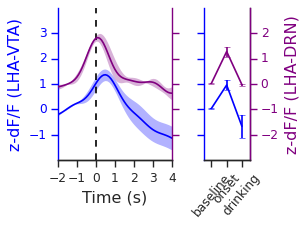

In [31]:
sct.plotMeans('LHA-VTA','consumption',output2='LHA-DRN',periods=['baseline','onset','drinking'],
              plot_type='mean and SEM',xlim=[-2,4],
              ylim=[-2,4],yticks=[-1,0,1,2,3],ylab='z-dF/F (LHA-VTA)',color='blue',
              ylim1=[-3,3],yticks1=[-2,-1,0,1,2],ylab1='z-dF/F (LHA-DRN)',color1='purple',
              figsize=(4,3),save=True,imgname='./results/LHA-retro/LHA-retro_LHA-VTA-LHA-DRN_SCT_consumption-onset_means.pdf')
plt.show()

In [ ]:
df = sct.getDataFrameAUC('consumption','onset',['baseline','onset','drinking'],
                         save=True,csvname='./stats/LHA-retro_SCT_consumption-onset_auc.csv')

In [ ]:
%%R
df = read.csv('./stats/LHA-retro_SCT_consumption-onset_auc.csv')

print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
ranks <- rank(drn$auc)
require(nlme)
Lme.mod <- lme(ranks ~ period, random = ~ 1 | mouse, data = drn)
print(summary(glht(Lme.mod, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
ranks <- rank(vta$auc)
require(nlme)
Lme.mod <- lme(ranks ~ period, random = ~ 1 | mouse, data = vta)
print(summary(glht(Lme.mod, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = ranks ~ period, data = drn, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)   
drinking - baseline == 0   -1.667      1.247  -1.336  0.30540   
onset - baseline == 0       3.667      1.247   2.940  0.00635 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = ranks ~ period, data = vta, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
drinking - baseline == 0  -3.0000     0.7454  -4.025 0.000113 ***
onset - baseline == 0      3.000

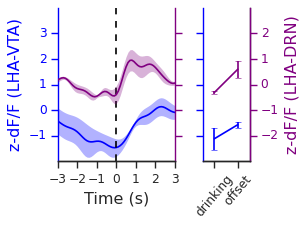

In [ ]:
sct.plotMeans('LHA-VTA','consumption','offset',output2='LHA-DRN',
              plot_type='mean and SEM',
              periods=['drinking','offset'],xlim=[-3,3],
              ylim=[-2,4],yticks=[-1,0,1,2,3],ylab='z-dF/F (LHA-VTA)',color='blue',
              ylim1=[-3,3],yticks1=[-2,-1,0,1,2],ylab1='z-dF/F (LHA-DRN)',color1='purple',
              figsize=(4,3),save=True,imgname='./results/LHA-retro/LHA-retro_LHA-VTA-LHA-DRN_SCT_consumption-offset_means.pdf')
plt.show()

#### OFT

In [32]:
oft = FiberPhotometryTest('LHA-retro.h5','OFT')

Experiment information for test OFT is successfully loaded.


In [33]:
oft.getMeans(auc_frames = {'immobility-onset': [[-3,-1],[1,3]],
                          'immobility-offset': [[-3,-1],[-1,0],[0,1],[1,3]]})

LHA87,1 LHA91,1 LHA92,1 .
Saved dF/F mean traces for LHA-DRN immobility-offset
LHA87,1 LHA91,1 LHA92,1 .
Saved dF/F mean traces for LHA-DRN immobility-onset
LHA87,1 LHA90,1 LHA91,1 LHA92,1 .
Saved dF/F mean traces for LHA-VTA immobility-offset
LHA87,1 LHA90,1 LHA91,1 LHA92,1 .
Saved dF/F mean traces for LHA-VTA immobility-onset
LHA87,1 LHA90,1 LHA91,1 LHA92,1 .
Saved dF/F mean traces for movement immobility-offset.
LHA87,1 LHA90,1 LHA91,1 LHA92,1 .
Saved dF/F mean traces for movement immobility-onset.


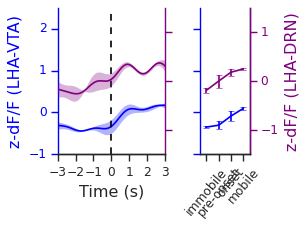

In [34]:
oft.plotMeans('LHA-VTA','immobility','offset',output2='LHA-DRN',
              plot_type='mean and SEM',
              periods=['immobile','pre-onset','onset','mobile'],xlim=[-3,3],
              ylim=[-1,2.5],yticks=[-1,0,1,2],ylab='z-dF/F (LHA-VTA)',color='blue',
              ylim1=[-1.5,1.5],yticks1=[-1,0,1],ylab1='z-dF/F (LHA-DRN)',color1='purple',
              subplot_ratio=[5,2.3],figsize=(4,3),save=True,
              imgname='./results/LHA-retro/LHA-retro_LHA-VTA-LHA-DRN_OFT_mobile-onset_means.pdf')
plt.show()

In [ ]:
df = oft.getDataFrameAUC('immobility','offset',['immobile','pre-onset','onset','mobile'],
                         save=True,csvname='./stats/LHA-retro_OFT_mobile-onset_auc.csv')

In [ ]:
%%R
df = read.csv('./stats/LHA-retro_OFT_mobile-onset_auc.csv')

print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
ranks <- rank(drn$auc)
require(nlme)
Lme.mod <- lme(ranks ~ period, random = ~ 1 | mouse, data = drn)
print(summary(glht(Lme.mod, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
ranks <- rank(vta$auc)
require(nlme)
Lme.mod <- lme(ranks ~ period, random = ~ 1 | mouse, data = vta)
print(summary(glht(Lme.mod, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = ranks ~ period, data = drn, random = ~1 | 
    mouse)

Linear Hypotheses:
                          Estimate Std. Error z value Pr(>|z|)    
mobile - immobile == 0       7.667      1.521   5.039   <0.001 ***
onset - immobile == 0        5.667      1.521   3.725   <0.001 ***
pre-onset - immobile == 0    3.333      1.521   2.191    0.074 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = ranks ~ period, data = vta, random = ~1 | 
    mouse)

Linear Hypotheses:
                          Estimate Std. Error z value Pr(>|z|)    
mobile - immobile == 0  

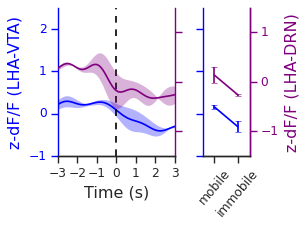

In [ ]:
oft.plotMeans('LHA-VTA','immobility','onset',output2='LHA-DRN',
              plot_type='mean and SEM',
              periods=['mobile','immobile'],xlim=[-3,3],
               ylim=[-1,2.5],yticks=[-1,0,1,2],ylab='z-dF/F (LHA-VTA)',color='blue',
              ylim1=[-1.5,1.5],yticks1=[-1,0,1],ylab1='z-dF/F (LHA-DRN)',color1='purple',
              figsize=(4,3),save=True,imgname='./results/LHA-retro/LHA-retro_LHA-VTA-LHA-DRN_OFT_immobile-onset_means.pdf')
plt.show()

#### TST

In [35]:
tst = FiberPhotometryTest('LHA-retro.h5','TST')

Experiment information for test TST is successfully loaded.


In [36]:
tst.getMeans(auc_frames = {'immobility-onset': [[-3,-1],[1,3]],
                          'immobility-offset': [[-3,-1],[-0.5,0],[0,1],[1,3]]})

LHA87,1 LHA91,1 LHA92,1 .
Saved dF/F mean traces for LHA-DRN immobility-offset
LHA87,1 LHA91,1 LHA92,1 .
Saved dF/F mean traces for LHA-DRN immobility-onset
LHA87,1 LHA90,1 LHA91,1 LHA92,1 .
Saved dF/F mean traces for LHA-VTA immobility-offset
LHA87,1 LHA90,1 LHA91,1 LHA92,1 .
Saved dF/F mean traces for LHA-VTA immobility-onset
LHA87,1 LHA90,1 LHA91,1 LHA92,1 .
Saved dF/F mean traces for movement immobility-offset.
LHA87,1 LHA90,1 LHA91,1 LHA92,1 .
Saved dF/F mean traces for movement immobility-onset.


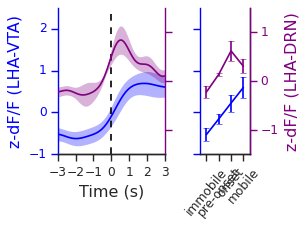

In [37]:
tst.plotMeans('LHA-VTA','immobility','offset',output2='LHA-DRN',
              plot_type='mean and SEM',
              periods=['immobile','pre-onset','onset','mobile'],xlim=[-3,3],
              ylim=[-1,2.5],yticks=[-1,0,1,2],ylab='z-dF/F (LHA-VTA)',color='blue',
              ylim1=[-1.5,1.5],yticks1=[-1,0,1],ylab1='z-dF/F (LHA-DRN)',color1='purple',
              subplot_ratio=[5,2.3],figsize=(4,3),save=True,
              imgname='./results/LHA-retro/LHA-retro_LHA-VTA-LHA-DRN_TST_mobile-onset_means.pdf')
plt.show()

In [ ]:
df = tst.getDataFrameAUC('immobility','offset',['immobile','pre-onset','onset','mobile'],
                    save=True,csvname='./stats/LHA-retro_TST_mobile-onset_auc.csv')

In [ ]:
%%R
df = read.csv('./stats/LHA-retro_TST_mobile-onset_auc.csv')

print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
ranks <- rank(drn$auc)
require(nlme)
Lme.mod <- lme(ranks ~ period, random = ~ 1 | mouse, data = drn)
print(summary(glht(Lme.mod, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
ranks <- rank(vta$auc)
require(nlme)
Lme.mod <- lme(ranks ~ period, random = ~ 1 | mouse, data = vta)
print(summary(glht(Lme.mod, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = ranks ~ period, data = drn, random = ~1 | 
    mouse)

Linear Hypotheses:
                          Estimate Std. Error z value Pr(>|z|)    
mobile - immobile == 0       5.333      1.509   3.534  0.00118 ** 
onset - immobile == 0        8.667      1.509   5.742  < 0.001 ***
pre-onset - immobile == 0    4.000      1.509   2.650  0.02218 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = ranks ~ period, data = vta, random = ~1 | 
    mouse)

Linear Hypotheses:
                          Estimate Std. Error z value Pr(>|z|)    
mobile - immobile == 0  

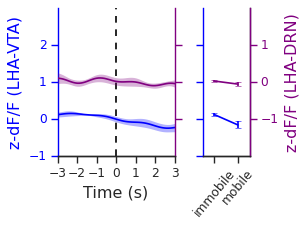

In [ ]:
 tst.plotMeans('LHA-VTA','immobility','onset',output2='LHA-DRN',
              plot_type='mean and SEM',
              periods=['immobile','mobile'],xlim=[-3,3],
              ylim=[-1,3],yticks=[-1,0,1,2],ylab='z-dF/F (LHA-VTA)',color='blue',
              ylim1=[-2,2],yticks1=[-1,0,1],ylab1='z-dF/F (LHA-DRN)',color1='purple',
              figsize=(4,3),save=True,imgname='./results/LHA-retro/LHA-retro_LHA-VTA-LHA-DRN_TST_immobile-onset_means.pdf')
plt.show()

# Example traces

In [ ]:
r = FiberPhotometryRecording()
r.loadRecording('LHA-retro.h5','LHA92','APT','1')
r.getDFF(airpls_lambda=5e3,smooth_win=1.5)

The recording for mouse LHA92 in the experiment APT-1 is successfully loaded.


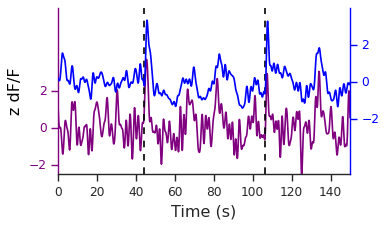

In [ ]:
r.plotExample(['LHA-DRN','LHA-VTA'],event='airpuff',
              t0=140,t1=290,ylim=[-2.5,6.5],ylim1=[-5,4],
              yticks=[-2,0,2],yticks1=[-2,0,2],
              figsize=(5,3),save=True,imgname='./results/LHA-retro/LHA-retro_APT_example.pdf')
plt.show()

In [ ]:
r = FiberPhotometryRecording()
r.loadRecording('LHA-retro.h5','LHA87','SCT','2')
r.getDFF(airpls_lambda=5e3,smooth_win=2)

The recording for mouse LHA87 in the experiment SCT-2 is successfully loaded.


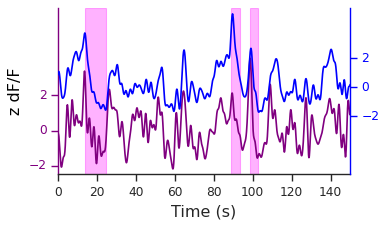

In [ ]:
r.plotExample(['LHA-DRN','LHA-VTA'],'consumption',
              t0=50,t1=200,ylim=[-2.5,7],ylim1=[-6,5.5],
              yticks=[-2,0,2],yticks1=[-2,0,2],
              figsize=(5,3),save=True,imgname='./results/LHA-retro/LHA-retro_SCT_example.pdf')
plt.show()

In [ ]:
r = FiberPhotometryRecording()
r.loadRecording('LHA-retro.h5','LHA92','OFT','1')
r.getDFF(airpls_lambda=5e3,smooth_win=2)

The recording for mouse LHA92 in the experiment OFT-1 is successfully loaded.


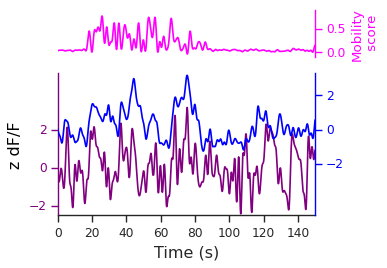

In [ ]:
r.plotExample(['LHA-DRN','LHA-VTA'],measure='movement',
              t0=40,t1=190,ylim=[-2.5,5],ylim1=[-5,3.3],
              yticks=[-2,0,2],yticks1=[-2,0,2],
              ylim_m=[-0.1,0.9],yticks_m=[0,0.5],
              figsize=(5,3.5),save=True,imgname='./results/LHA-retro/LHA-retro_OFT_example.pdf')
plt.show()

In [ ]:
r = FiberPhotometryRecording()
r.loadRecording('LHA-retro.h5','LHA87','TST','1')
r.getDFF(airpls_lambda=5e3,smooth_win=2)

The recording for mouse LHA87 in the experiment TST-1 is successfully loaded.


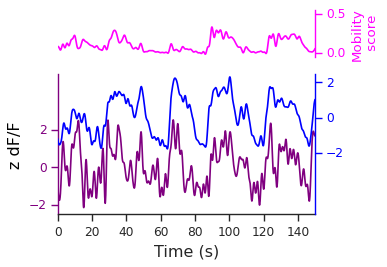

In [ ]:
r.plotExample(['LHA-DRN','LHA-VTA'],measure='movement',
              t0=200,t1=350,ylim=[-2.5,5],ylim1=[-5.5,2.5],
              yticks=[-2,0,2],yticks1=[-2,0,2],
              ylim_m=[-0.05,0.55],yticks_m=[0,0.5],
              figsize=(5,3.5),save=True,imgname='./results/LHA-retro/LHA-retro_TST_example.pdf')
plt.show()